In [1]:
from locallib import analysis, crypto, util
import matplotlib.pyplot as plt
import itertools
import string

# Explanations

In [2]:
# EXPLANATION WHY ISOMORPHIC TEXTS GIVE YOU THIS D VALUE
# -------------------------------------------------------
# 
# For example: The basic plaintext
# - AAAAFGHI
# - BBBBFGHI
# 
# The difference between F-G-H-I will be the sample for both
# The value that F will start at will be different
# So therefore if you subtract the encrypted values itll be a flat value "d" for the isomorphic section
# 
# For example: The matching numeric ciphertext
# 0 3 2 4 . 5 1 3 4
# 1 2 5 1 . 2 4 0 1
# (2 - 5) % 6 = 3
# (4 - 1) % 6 = 3
# (0 - 3) % 6 = 3
# (1 - 4) % 6 = 3

---

# Basic Isomorphs

In [3]:
print("Plaintext <-> Ciphertext Isomorph (Caeser Cipher)\n")

pt = "TESTINGISOMORPHS"
pt_a = string.ascii_uppercase
cts = [ [i, "".join(crypto.encode_caeser(pt, pt_a, i))] for i in range(-1, 2) ]

for ct in cts:
    print(f"Shift: {ct[0]}")
    print("   " + pt)
    print("-> " + ct[1])
    print(" = " + util.text_diff(pt_a, ct[1], pt))
    print(analysis.calc_if_isomorphic([ pt, ct[1] ]))
    print()


Plaintext <-> Ciphertext Isomorph (Caeser Cipher)

Shift: -1
   TESTINGISOMORPHS
-> SDRSHMFHRNLNQOGR
 = ZZZZZZZZZZZZZZZZ
(True, [1, nan, 2, 1, 3, nan, nan, 3, 2, 4, nan, 4, nan, nan, nan, 2], 4)

Shift: 0
   TESTINGISOMORPHS
-> TESTINGISOMORPHS
 = AAAAAAAAAAAAAAAA
(True, [1, nan, 2, 1, 3, nan, nan, 3, 2, 4, nan, 4, nan, nan, nan, 2], 4)

Shift: 1
   TESTINGISOMORPHS
-> UFTUJOHJTPNPSQIT
 = BBBBBBBBBBBBBBBB
(True, [1, nan, 2, 1, 3, nan, nan, 3, 2, 4, nan, 4, nan, nan, nan, 2], 4)




Ciphertext <-> Ciphertext Isomorph (Caeser Progressive Cipher)

EVERY SUBSTITUTION CIPHER NEEDS A SUBSTITUTION KEY
FWFSZ UWDUVKVWVKQP FLSKHU RIIHW F YAHYZOZAZOUT RLF

CT <-> CT
([1, 2, 1, 3, 4, 5, 6, 2, nan, 6, 7, 8, 7, 2, 7, 8, nan, nan, 5, 1, 9, 3, 8, 10, 6, 5, 11, 12, 12, 10, 2, 5, 1, 5, 13, 14, 10, 13, 4, 15, 4, 14, 4, 15, 6, nan, 5, 11, 9], 15, [[0, 49], [0, 49]])

PT <-> CT
([1, nan, 1, 2, 3, nan, 2, 4, 5, 4, 3, 4, 5, nan, nan, 1, nan, nan], 5, [[31, 49], [31, 49]])
([nan, nan, nan, 1, 2, 3, nan, 2, 4, 5, 4, 3, 4, 5, nan, nan, 1], 5, [[2, 19], [2, 19]])
([nan, nan, nan, 1, 1, nan, nan], 1, [[24, 31], [24, 31]])



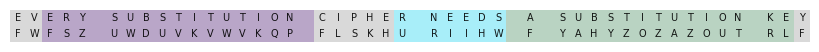

In [5]:
print("\nCiphertext <-> Ciphertext Isomorph (Caeser Progressive Cipher)\n")

pt = "EVERY SUBSTITUTION CIPHER NEEDS A SUBSTITUTION KEY"
pt_a = string.ascii_uppercase
ct = crypto.encode_caeser_progressive_word(pt, pt_a, 1)

print(pt)
print(ct)
print()

print("CT <-> CT")
isos22 = analysis.calc_isomorphs([ ct, ct ])
for iso in isos22: print(iso)
print()

print("PT <-> CT")
isos12 = analysis.calc_isomorphs([ pt, ct ])
for iso in isos12: print(iso)
print()

isos12_im = analysis.conv_isomorphs_to_img([ pt, ct ], isos12)
analysis.plot_im(
    im=isos12_im,
    to_label=True,
    labels=[ pt, ct ],
    cast_labels=False,
    figsize=(10,2))
plt.show()


---

# Chaining Example 1

Following example in link below, run analysis to extract chains then manually alphabet chain.
Afterwards attempt to decimate.

https://docs.google.com/document/d/1a4uOf7SkXEPCROEi1iHzU5Lbr3zMbtOqSq_J5c4kyOw/edit

In [4]:
isomorphs = [
    "USLLMMBEEFQWECSZTGAOMPGCATEUSEILFVKWJSAXGZS",
    "XVAAWWNRRTLCRSVHJUPZWEUSPJRXVRYATBFCOVPDUHV",
    "JGWWHHXVVQMIVYGELTCPHSTYCLVJGVKWQUNIAGCOTEG"
]

all_pairs = list(itertools.combinations(isomorphs, 2))
all_chains = []
for pair in all_pairs:
    print(analysis.calc_if_isomorphic(pair))
    chain = analysis.calc_chains(pair[0], pair[1])
    all_chains.append(chain)
    print(chain)

(True, [1, 2, 3, 3, 4, 4, nan, 5, 5, 6, nan, 7, 5, 8, 2, 9, 10, 11, 12, nan, 4, nan, 11, 8, 12, 10, 5, 1, 2, 5, nan, 3, 6, nan, nan, 7, nan, 2, 12, nan, 11, 9, 2], 12)
['MWCSVBN', 'KFTJOZH', 'GUXD', 'QLAPER', 'IY']
(True, [1, 2, 3, 3, 4, 4, nan, 5, 5, 6, nan, 7, 5, 8, 2, 9, 10, 11, 12, nan, 4, nan, 11, 8, 12, 10, 5, 1, 2, 5, nan, 3, 6, nan, nan, 7, nan, 2, 12, nan, 11, 9, 2], 12)
['ZEVUJACY', 'BXOPSGTLWIKN', 'FQMH']
(True, [1, 2, 3, 3, 4, 4, nan, 5, 5, 6, nan, 7, 5, 8, 2, 9, 10, 11, 12, nan, 4, nan, 11, 8, 12, 10, 5, 1, 2, 5, nan, 3, 6, nan, nan, 7, nan, 2, 12, nan, 11, 9, 2], 12)
['BUTQ', 'ZPCI', 'DOAWHESYK', 'FNXJLM', 'RVG']


In [5]:
#   :: Sets of chains produced from script
# 1:2 | QLAPER       | MWCSVBN  | IY   | KFTJOZH | GUXD
# 2:3 | BXOPSGTLWIKN | ZEVUJACY | FQMH
# 1:3 | DOAWHESYK    | RVG      | BUTQ | ZPCI    | FNXJLM

#   :: Matching the folowing chains
# 1:2 | KFTJOZH
# 1:3 | FNXJLM

#   :: Can perform alphabet chaining as such
# x3   | K..F..T..J..O..Z..H
# x2   |    F.N.X.J.L.M
#      | -------------------
# SUM  | K..F.NTX.J.LOM.Z..H

#   :: Then have to stretch all other chains from the pairs
# 1:2 x3 | Q..L..A..P..E..R  | M..W..C..S..V..B..N  I..Y | K..F..T..J..O..Z..H | I..Y    | G..U..X..D
# 1:3 x2 | D.O.A.W.H.E.S.Y.K | R.V.G                     | B.U.T.Q             | Z.P.C.I | F.N.X.J.L.M

#   :: So can now continue and find another chain
# 1:2 x3 |   M..W..C..S..V..B..N
# 1:3 x2 | D.O.A.W.H.E.S.Y.K B.U.T.Q
#        | -------------------------
# SUM    | D.OMA.W.HCE.S.YVK.B.UNT.Q
# 1:3 x2 |      Z.P.C.I R.V.G
#        | -------------------------
# SUM    | D.OMAZWPHCEISRYVKGB.UNT.Q

#   :: Now try join the 2 together
# XXXXXXXXXXXXXXXXXXXXXXXXXX~~~~~~~~~~~~~~~~~~~~~~~~~
# D.OMAZWPHCEISRYVKGB.UNT.Q.D.OMAZWPHCEISRYVKGB.UNT.Q
#                 K..F.NTX.J.LOM.Z..H
# DLOMAZWPHCEISRYVKGBFUNTXQJDLOMAZWPHCEISRYVKGBFUNTXQ

# Found: OMAZWPHCEISRYVKGBFUNTXQJDL

# This is not the original however, only an equivalent.
# You can find the original by looking at all possible decimations and decoding ciphertext:

#  1:  UIJQJQSMOEYNQTQKWDSCCSNSWXEFEPPTRHHXVLBEMKT
#  2:  UEXNNFWTULAESCELKCUKVGJVHQEBHAMGPLDYZKWXVLW
#  3:  UCNBGYDVSBUJDTTSDBOXNTMBEJEGWLJSLUBZNZUELSK
#  4:  UHFVRCUHACEYYCHXELEALLPNSDEKAQNPNRETIUHXRXD
#  5:  UPGSCAYLTDDMOTUHUEBIPWIQYLEVONGOVWORLCTEJHE
#  6:  UWVCZJHUYGKBKCWFAFDBRIVLKOEYDBRXCJUAGQEXIFU
#  7:  UZRWLUORWHWPATBAYOHJFKFABMERQVCBMBSNPRQEXAA
#  8:  UAIMXVTWQJTTBCAVQIKWJNXPUAESTSZRXIASXOSXCVY
#  9:  UMCDFEKJKKSIWTKDHUQRZDLETZEIUCLHGATMRGDENDQ
# 10:  UOPXVZEBHPODUCOIBMWUIZZRQWEEBWXMIXYUMWYXPIH
# 11:  ULZUIDAIDQBVHTYTOSYLGECKDPECKMFQZKWIFNOEFTB
# 12:  UDMGPNQABVHATCDPSNTHXVRFOHEHYDVFJCQOCEKXZPO
# 13:  UJLYMKBXEWQFETSBTAAVMUGTACEPSXIYFOKFJJAEGBS
# 14:  UQJIJISKOXYHQCQMWRSTCJNJWEEWEUPCRNHEVYBXMMT
# 15:  UXXHNWWCUYAXSTEYKTUMVAJOHIEZHGMAPYDLZMWEVYW
# 16:  UTNZGLDOSZUSDCTJDZOENCMZESEAWYJJLPBBNBUXLJK
# 17:  UNFORTUNATELYTHEEYEGLYPHSREMAINUNDECIPHERED
# 18:  UUGJCGYYTRDKOCUNUXBQPFIIYYEOOHGVVFODLTTXJNE
# 19:  UFVTZSHPYAKZKTWWAWDZRQVYKVELDZRECSUGGIEEIWU
# 20:  UBRFLPODWNWUACBGYVHSFMFGBKEDQOCZMZSHPDQXXGA
# 21:  UGIKXOTFQSTCBTAOQQKFJHXUUGEJTJZDXQAJXVSECOY
# 22:  UKCRFXKSKMSQWCKRHPQDZRLXTBEQUTLNGGTKRADXNRQ
# 23:  UVPEVBEZHUORUTOQBKWPIBZDQFEXBFXKIEYPMFYEPQH
# 24:  UYZPIRAQDIBOHCYCOJYYGXCMDUETKKFIZMWQFHOXFCB
# 25:  URMAPHQGBOHGTTDUSHTNXORWONENYRVWJTQVCXKEZUO

# Found: UNFORTUNATELYTHEEYEGLYPHSREMAINUNDECIPHERED


In [6]:
def map_c_to_v(c):
    return string.ascii_uppercase.index(c)

def map_v_to_c(c):
    return string.ascii_uppercase[c]

def safe_mod(v, l):
    while v < 0:
      v += l
    return v % l

alphabet = "OMAZWPHCEISRYVKGBFUNTXQJDL"
print(alphabet)
print("")

# Try each 2 <= d < 26 multiplier for decimation
outputs = []
for d in range(3, 26):

  # Try each rotation of the candidate alphabet
  for rot in range(len(alphabet)):
    rot_alphabet = (alphabet[-rot:] if rot > 0 else "") + alphabet[:len(alphabet) - rot]
    rot_alphabet_v = [ map_c_to_v(c) for c in rot_alphabet ]
    # print(rot_alphabet)

    # Reverse decimation to get new_alphabet_v and new_alphabet_v_inv
    new_alphabet_v_inv = { }
    for i, v in enumerate(rot_alphabet_v):
      new_alphabet_v_inv[safe_mod(d * i, 26)] = v

    # Print output if possible
    try:
      new_alphabet_v = { }
      for i in range(26):
        new_alphabet_v[new_alphabet_v_inv[i]] = i
      output = "".join([ map_v_to_c(new_alphabet_v[i]) for i in range(26) ])
      final_output = str(d) + "," + str(rot) + " : " + output
      outputs.append(final_output + "\n")
    except: pass

# Print outputs to file so can see
with open("NB_general_isomorphs.txt", "w") as f:
  f.writelines(outputs)


OMAZWPHCEISRYVKGBFUNTXQJDL



---

# Chaining Example 2

Using progressive encoding encode custom ciphertext. Then extract chains, and manually alphabet chain to extract original alphabet.

In [7]:
# Setup plaintext and ciphertext
alphabet = "ABCDEFGHIJ"
pts = [ "FIAAGHBCJFFBA", "HBCDDAAGHBCJFFBA", "HBDAAGHBCJFFBABCDFG" ]
cts = [ crypto.encode_caeser_progressive_letter(pt, alphabet, 0, 2) for pt in pts ]

# Calculate isomorphs and chains
i_pairs = list(itertools.combinations(range(len(cts)), 2))
pair_isos = [ analysis.calc_isomorphs([ cts[pair[0]], cts[pair[1]] ])[0] for pair in i_pairs ]
pair_isos_texts = [
    [ cts[i_pairs[i][0]][ pair_isos[i][2][0][0]:pair_isos[i][2][0][1] ],
      cts[i_pairs[i][1]][ pair_isos[i][2][0][0]:pair_isos[i][2][0][1] ] ]
    for i in range(len(i_pairs))]
pair_chains = [ analysis.calc_chains(pair_isos_texts[i][0], pair_isos_texts[i][1]) for i in range(len(i_pairs)) ]

# Print out all information
print(f"Alphabet ({len(alphabet)}): {alphabet}")
print("\nPT -> CT")
for i in range(len(cts)):
    print(f"({i}): '{pts[i]}' -> '{cts[i]}'")
print("\nIsomorphs")
for i in range(len(i_pairs)):
    print(f"{i_pairs[i]}: {pair_isos[i][0]} = '{pair_isos_texts[i][0]}' = '{pair_isos_texts[i][1]}'")
print("")
print("\nChains")
for i in range(len(i_pairs)):
    print(f"{i_pairs[i]}: {pair_chains[i]}")


Alphabet (10): ABCDEFGHIJ

PT -> CT
(0): 'FIAAGHBCJFFBA' -> 'FAEGEHDGFDFDE'
(1): 'HBCDDAAGHBCJFFBA' -> 'HDGJBACADJCBJBJA'
(2): 'HBDAAGHBCJFFBABCDFG' -> 'HDHGIGJFIHFHFGJCFJC'

Isomorphs
(0, 1): [1, 2, 1, nan, 3, 2, 4, 3, 4, 3] = 'EGEHDGFDFD' = 'GJBACADJCB'
(0, 2): [1, 2, 1, nan, 3, 2, 4, 3, 4, 3] = 'EGEHDGFDFD' = 'HGIGJFIHFH'
(1, 2): [1, 2, 3, 2, nan, 4, 3, 1, 4, 1, 4] = 'BACADJCBJBJ' = 'IGJFIHFHFGJ'


Chains
(0, 1): ['EGA', 'FDC', 'DJ', 'GJ', 'EB', 'FC', 'HA', 'DB']
(0, 2): ['DHGGFFI', 'DJ', 'EH', 'EI']
(1, 2): ['BH', 'CJJH', 'CF', 'BI', 'DI', 'AF', 'AG', 'JF', 'BG']


In [8]:
print(" ".join([ l for l in pair_isos_texts[0][0]]))
print(" ".join([ str(map_c_to_v(l)) for l in pair_isos_texts[0][0]]))
print("")
print(" ".join([ l for l in pair_isos_texts[0][1]]))
print(" ".join([ str(map_c_to_v(l)) for l in pair_isos_texts[0][1]]))
print("")
print(" ".join([ l for l in pair_isos_texts[1][0]]))
print(" ".join([ str(map_c_to_v(l)) for l in pair_isos_texts[1][0]]))
print("")
print(" ".join([ l for l in pair_isos_texts[1][1]]))
print(" ".join([ str(map_c_to_v(l)) for l in pair_isos_texts[1][1]]))
print("")
print(" ".join([ l for l in pair_isos_texts[2][0]]))
print(" ".join([ str(map_c_to_v(l)) for l in pair_isos_texts[2][0]]))
print("")
print(" ".join([ l for l in pair_isos_texts[2][1]]))
print(" ".join([ str(map_c_to_v(l)) for l in pair_isos_texts[2][1]]))
print("")

E G E H D G F D F D
4 6 4 7 3 6 5 3 5 3

G J B A C A D J C B
6 9 1 0 2 0 3 9 2 1

E G E H D G F D F D
4 6 4 7 3 6 5 3 5 3

H G I G J F I H F H
7 6 8 6 9 5 8 7 5 7

B A C A D J C B J B J
1 0 2 0 3 9 2 1 9 1 9

I G J F I H F H F G J
8 6 9 5 8 7 5 7 5 6 9



In [9]:
# 12 6x | HDJ  EA  FB  GC
# 13 2x | DFHJ EGI
# 23 6x | DJF  AG  CI  BH

#         XXXXXXXXXX~~~~~~~~~~
# 12 6x |     H.....D.....J
# 13 2x | D.F.H.J   D.F.H.J

#         XXXXXXXXXX~~~~~~~~~~
# 13 2x | D.F.H.J   D.F.H.J
# 23 6x | D.....J.....F
# 23 6x |         B.....H
# SUM   | D.F.H.J.B.

#         XXXXXXXXXX~~~~~~~~~~
# 13 2x | E.G.I.....E.G.I.....
# 12 6x | E.....A
# 23 6x |       A.....G
# 23 6x |         C.....I
# SUM   | E.G.I.A.C.

#       | D.F.H.J.B.
#       | .E.G.I.A.C
# SUM   | DEFGHIJABC

# ABCDEFGHIJ
